In [1]:
import polars as pl
import os
from pathlib import Path
import pandas as pd
import hvplot.polars

csv_options_data = Path.cwd().parent / "Data/S&P500_optiondata.csv"
parquet_file = (Path.cwd().parent / "Data/S&P500_optiondata")

data_path = Path.cwd().parent / "Data"

In [126]:
pl.read_csv(csv_options_data, separator = ",").estimated_size("mb")

3053.2674922943115

In [127]:
df = pl.scan_csv(csv_options_data, separator=",")
df.schema
df.fetch(1000)

secid,date,exdate,cp_flag,strike_price,impl_volatility,delta,optionid,ticker,index_flag,issuer,exercise_style
i64,str,str,str,i64,str,str,i64,str,i64,str,str
108105,"""2019-01-02""","""2019-01-18""","""C""",1000000,null,null,121564922,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1025000,null,null,127117395,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1050000,null,null,127111810,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1075000,null,null,127117396,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1100000,null,null,117411005,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1125000,null,null,127117397,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1150000,null,null,117411006,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1175000,null,null,127117398,"""SPX""",1,"""CBOE S&P 500 I…","""E"""
108105,"""2019-01-02""","""2019-01-18""","""C""",1200000,null,null,117411007,"""SPX""",1,"""CBOE S&P 500 I…","""E"""


# Lower the data by use off more efficient data types for storage


In [128]:
df.collect().approx_n_unique()

secid,date,exdate,cp_flag,strike_price,impl_volatility,delta,optionid,ticker,index_flag,issuer,exercise_style
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1,1020,751,2,787,1218445,1957718,362779,1,1,1,1


In [129]:
df.group_by("strike_price").count().collect().head(5)

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_2915/2534429492.py:1: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  df.group_by("strike_price").count().collect().head(5)


strike_price,count
i64,u32
4430000,20752
3290000,28612
2425000,41317
3775000,53611
3225000,65129


In [130]:
df.group_by("date").count().collect().head()

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_2915/289431764.py:1: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  df.group_by("date").count().collect().head()


date,count
str,u32
"""2021-09-03""",21762
"""2022-04-19""",18260
"""2020-07-22""",15854
"""2022-06-29""",20216
"""2019-07-10""",14172


In [131]:
#Desired data types for the columns
int_cols = ["secid", "strike_price",]
float_cols = ["impl_volatility", "delta"]
datetime_cols = ["date","exdate"]
str_cols = ["cp_flag", "ticker", "exercise_style"]
drop_cols = ["optionid", "index_flag", "issuer"]

In [132]:
#one line to do all the above
df = df.with_columns(
    [ pl.col(int_cols).cast(pl.Int64),
      pl.col(float_cols).cast(pl.Float64),
      pl.col(datetime_cols).cast(pl.Date),
      pl.col(str_cols).cast(pl.String),
    ]
).drop(drop_cols)



In [133]:
df

<LazyFrame [9 cols, {"secid": Int64 … "exercise_style": String}] at 0x13962E210>

In [134]:
# Saving file
data_path_parq = Path.cwd().parent / "Data/option_data.parquet"

save_parquet = True
if save_parquet or not os.path.exists(data_path_parq):
    df.sink_parquet(data_path_parq)

In [135]:
df = pl.read_parquet(data_path_parq)
df.estimated_size("mb")

1511.6457557678223

In [136]:
#Filter data that is not available for IV and delta
df = df.with_columns(
    days_till_exp = pl.col("exdate").sub(pl.col("date").cast(pl.Int64)) 
).sort("cp_flag").sort("date")

# df = df.filter(pl.col("impl_volatility").is_not_null() & pl.col("delta").is_not_null())



In [137]:
df.sort("days_till_exp")

secid,date,exdate,cp_flag,strike_price,impl_volatility,delta,ticker,exercise_style,days_till_exp
i64,date,date,str,i64,f64,f64,str,str,i64
108105,2019-01-02,2019-01-02,"""C""",1500000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1550000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1600000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1650000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1700000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1750000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1800000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1850000,null,null,"""SPX""","""E""",0
108105,2019-01-02,2019-01-02,"""C""",1900000,null,null,"""SPX""","""E""",0


# Days till experie graphical information #

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_2915/366311473.py:4: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  dataseries = df.group_by("days_till_exp").count().sort("days_till_exp")


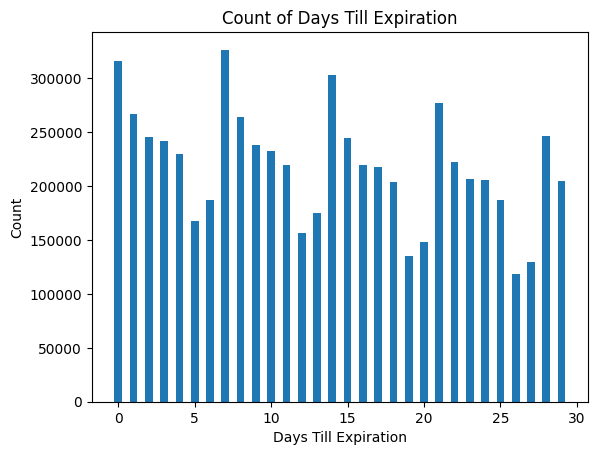

In [162]:
import matplotlib.pyplot as plt

# Now perform the groupby and aggregation
dataseries = df.group_by("days_till_exp").count().sort("days_till_exp")

# Create filter for less days
dataseries = dataseries.filter(pl.col("days_till_exp") < 30)


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of 'days_till_exp'
ax.bar(dataseries['days_till_exp'], dataseries['count'], width=0.5)

# # Add labels and title
ax.set_xlabel('Days Till Expiration')
ax.set_ylabel('Count')
ax.set_title('Count of Days Till Expiration')

# # Show the plot
plt.show()

In [175]:
import datetime

#Filter by date range
df_filter = df.filter(
    pl.col("exdate").is_between(datetime.datetime(2022, 11, 1), datetime.datetime(2022, 11, 30)),
)

#Filter data that is not available for days till experire
df_till_exp = df_filter.filter(pl.col("days_till_exp") < 8)

#Counts the amount of option contracts per day for put and call seperately
daily_amount_contracts = df_filter.group_by(["date","cp_flag"]).count().sort("date").sort("cp_flag")
exdate_amount_contract = df_filter.group_by(["exdate","cp_flag"]).count().sort("exdate").sort("cp_flag")


/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_2915/3115069955.py:12: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  daily_amount_contracts = df_filter.group_by(["date","cp_flag"]).count().sort("date").sort("cp_flag")
/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_2915/3115069955.py:13: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  exdate_amount_contract = df_filter.group_by(["exdate","cp_flag"]).count().sort("exdate").sort("cp_flag")


In [176]:
# daily_amount_contracts.sort("cp_flag")
exdate_amount_contract.sort("exdate")

exdate,cp_flag,count
date,str,u32
2022-11-01,"""C""",2592
2022-11-01,"""P""",2592
2022-11-02,"""C""",2831
2022-11-02,"""P""",2831
2022-11-03,"""C""",2634
2022-11-03,"""P""",2634
2022-11-04,"""C""",7638
2022-11-04,"""P""",7638
2022-11-07,"""C""",2852


In [171]:
import matplotlib.pyplot as plot
import hvplot.pandas
%matplotlib inline
color_dict = {'P': 'red', 'C': 'green'}
# daily_amount_contracts.plot.bar(x='date', y='count', by='cp_flag', stacked = True)
exdate_amount_contract.plot.bar(x='exdate', y='count', by='cp_flag', stacked = True)

:Bars   [exdate,cp_flag]   (count)

In [143]:
# daily_amount_contracts.drop("cp_flag")
daily_amount_contracts_call = daily_amount_contracts.filter(pl.col("cp_flag") == "C")
daily_amount_contracts_put = daily_amount_contracts.filter(pl.col("cp_flag") == "P")

In [144]:
daily_amount_contracts_put.shape

(21, 3)

# Monthly count of puts and calls

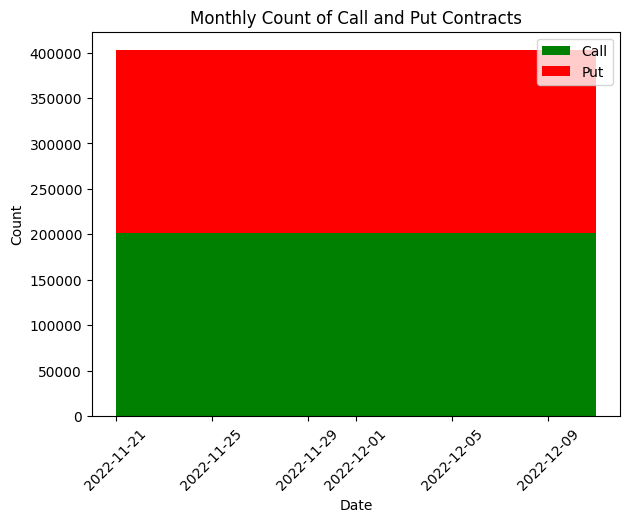

In [145]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.dates as mdates

dataseries_call = (daily_amount_contracts_call.sort(pl.col("date")).group_by_dynamic("date",  every = "1mo").agg(pl.col("count").sum()))
dataseries_put = (daily_amount_contracts_put.sort(pl.col("date")).group_by_dynamic("date",  every = "1mo").agg(pl.col("count").sum()))

# Reset index to make 'date' a column again for plotting
dataseries_call = dataseries_call.to_pandas().reset_index()
dataseries_put = dataseries_put.to_pandas().reset_index()

# Create a figure and a set of subplots
fig, ax = plt.subplots()
width = 20

# Plot the 'count' from dataseries_call
ax.bar(dataseries_call['date'], dataseries_call['count'], label='Call', width =width, color = "green")

# Plot the 'count' from dataseries_put
ax.bar(dataseries_put['date'], dataseries_put['count'], bottom=dataseries_call['count'], label='Put', width = width, color = "red")

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Monthly Count of Call and Put Contracts')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()